In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def bipartite(G, N, M) :
  def dfs(x) :
    if vis[x]: return False

    vis[x] = True
    for y in G[x]:
      if sel[y] == -1 :
        sel[y] = x
        return True
      
    for y in G[x] :
      if dfs(sel[y]):
        sel[y] = x
        return True
    return False

  sel = [-1] * M
  res = 0
  for i in range(N) :
    vis = [False] * N
    res += dfs(i)
  return res, sel

def sol() :
  N = int(input())
  L = [[1] * N for _ in range(N)]
  M = int(input())
  for _ in range(M) :
    i, j = map(int, input().split())
    L[i-1][j-1] = 0

  vis1 = [[None] * N for _ in range(N)]
  id = 0
  for j in range(N) :
    should_increase = True
    i = 0
    while i < N and j < N :
      if not L[i][j] :
        should_increase = True
        i += 1
        j -= 1
        continue
      if should_increase :
        id += 1
        should_increase = False
      vis1[i][j] = id
      i += 1
      j -= 1
    id += 1
  
  for i in range(1, N) :
    j = N-1
    while i < N and j >= 0 :
      if not L[i][j] :
        should_increase = True
        i += 1
        j -= 1
        continue
      if should_increase :
        id += 1
        should_increase = False
      vis1[i][j] = id
      i += 1
      j -= 1
    id += 1
  
  vis2 = [[None] * N for _ in range(N)]
  id2 = 0
  for j in reversed(range(N)) :
    i = 0
    should_increase = True
    while i < N and j < N :
      if not L[i][j] :
        should_increase = True
        i += 1
        j += 1
        continue
      if should_increase :
        id2 += 1
        should_increase = False
      vis2[i][j] = id2
      i += 1
      j += 1
    id2 += 1
  
  for i in range(1, N) :
    j = 0
    should_increase = True
    while i < N and j < N :
      if not L[i][j] :
        should_increase = True
        i += 1
        j += 1
        continue
      if should_increase :
        id2 += 1
        should_increase = False
      vis2[i][j] = id2
      i += 1
      j += 1
    id2 += 1

  G = [[] for _ in range(id)]
  for i, l in enumerate(L) :
    for j, v in enumerate(l) :
      if not v or vis1[i][j] == None or vis2[i][j] == None: continue
      G[vis1[i][j]].append(vis2[i][j])
  
  res, sel = bipartite(G, id, id2)
  print(res)

sol()

### 자력솔
- 9525(룩 배치하기)와 동일한 유형.
- 이번엔 제대로 구현했다. 만약 비슷한 유형이 나와서 대각선 구현에 쩔쩔매기전에 편하게 처리할 수 있는 방향을 어느정도 외워두는게 편할 것 같다. 적어도 방향을 바꿔야겠다고 발상은 할 수 있게..
- 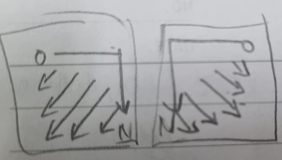
- id와 id2를 반대로 적어서 indexError가 두번났다.